In [204]:
import numpy as np
import cv2 as cv
from PIL import Image
from matplotlib import pyplot as plt

In [209]:
#image = cv.imread('images/a.png')
image = cv.imread('images/b.jpg')
gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
rectangle = cv.getStructuringElement(cv.MORPH_RECT, (7, 7))
image2 = cv.morphologyEx(gray, cv.MORPH_OPEN, rectangle)
image2 = cv.GaussianBlur(image2, (3, 3), 0)
ret,thresh = cv.threshold(image2,0,255, cv.THRESH_OTSU)
thresh = cv.morphologyEx(thresh, cv.MORPH_OPEN, rectangle)

In [210]:
contours,h = cv.findContours(thresh,1,2)
spoon = 0
sugar = 0
for cnt in contours:
    approx = cv.approxPolyDP(cnt,0.1*cv.arcLength(cnt,True),True)
    if len(approx) == 4:
        print ("square")
        sugar+=1
        image = cv.drawContours(image,[cnt],0,(0,0,255),-1)
    elif len(approx) < 4:
        print ("spoon")
        spoon+=1
        image = cv.drawContours(image,[cnt],0,(0,255,0),-1)

square
square
square
spoon


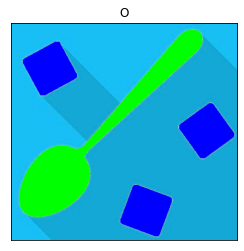

In [211]:
plt.plot(111),plt.imshow(image)
plt.title('O'), plt.xticks([]), plt.yticks([])
plt.show()

In [212]:
print(sugar)
print(spoon)

3
1
